### In this notebook, we are performing a regression analysis on JFK airport weather data.
#### The workflow includes:
1. Loading and cleaning the weather dataset.
2. Engineering features such as extracting hour and month from the date.
3. Training a Random Forest regression model to predict the dry bulb temperature (°F) using various weather features.
4. Evaluating the model's performance using metrics like Mean Squared Error and R^2 Score.
5. Visualizing the actual vs predicted temperatures and analyzing feature importances.

In [4]:
import pandas as pd

df_weather = pd.read_csv('jfk_weather_cleaned.csv')
print(df_weather)

                       DATE  visibility  dry_bulb_temp_f  wet_bulb_temp_f  \
0       2010-01-01 01:00:00        5.59             33.0             32.0   
1       2010-01-01 01:51:00        6.00             33.0             33.0   
2       2010-01-01 02:03:00        6.00             34.0             33.0   
3       2010-01-01 02:28:00        5.00             34.0             33.0   
4       2010-01-01 02:51:00        5.00             33.0             33.0   
...                     ...         ...              ...              ...   
114539  2018-07-27 20:26:00       10.00             70.0             69.0   
114540  2018-07-27 20:51:00       10.00             71.0             70.0   
114541  2018-07-27 21:51:00       10.00             72.0             71.0   
114542  2018-07-27 22:51:00       10.00             72.0             71.0   
114543  2018-07-27 23:59:00       10.00             72.0             71.0   

        dew_point_temp_f  relative_humidity  wind_speed  station_pressure  

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Drop rows with missing values (if any)
df_weather_clean = df_weather.dropna()

# Convert DATE to datetime and extract useful features
df_weather_clean['DATE'] = pd.to_datetime(df_weather_clean['DATE'])
df_weather_clean['hour'] = df_weather_clean['DATE'].dt.hour
df_weather_clean['month'] = df_weather_clean['DATE'].dt.month

# Select features and target for a simple regression (e.g., predict dry_bulb_temp_f)
features = [
    'visibility', 'wet_bulb_temp_f', 'dew_point_temp_f', 'relative_humidity',
    'wind_speed', 'station_pressure', 'sea_level_pressure', 'precip',
    'altimeter_setting', 'wind_direction_sin', 'wind_direction_cos',
    'pressure_tendency_incr', 'pressure_tendency_decr', 'pressure_tendency_const',
    'hour', 'month'
]
target = 'dry_bulb_temp_f'

X = df_weather_clean[features]
y = df_weather_clean[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Feature importance
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print("Feature Importances:")
print(importances)

Mean Squared Error: 0.02
R^2 Score: 1.00
Feature Importances:
wet_bulb_temp_f            9.447880e-01
relative_humidity          5.501893e-02
dew_point_temp_f           1.263037e-04
sea_level_pressure         9.403298e-06
wind_speed                 9.061852e-06
altimeter_setting          8.589259e-06
hour                       8.256141e-06
station_pressure           7.846968e-06
wind_direction_sin         7.376960e-06
wind_direction_cos         7.257933e-06
month                      4.328101e-06
visibility                 2.273825e-06
pressure_tendency_incr     8.624257e-07
pressure_tendency_decr     8.380044e-07
precip                     5.827687e-07
pressure_tendency_const    1.016677e-07
dtype: float64


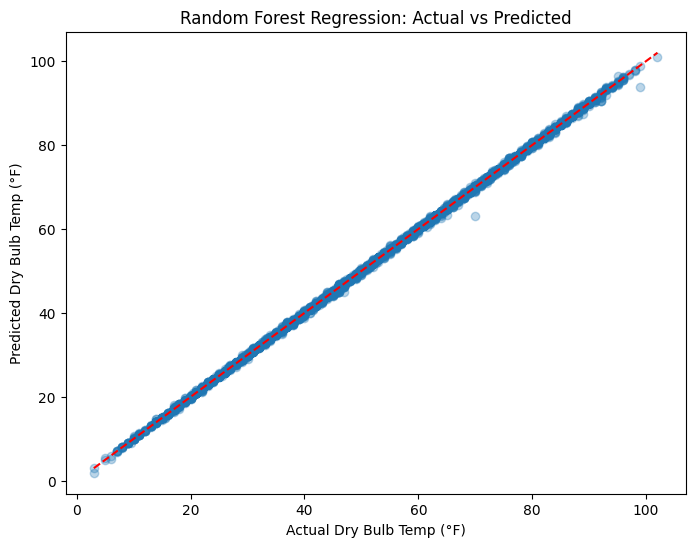

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Dry Bulb Temp (°F)")
plt.ylabel("Predicted Dry Bulb Temp (°F)")
plt.title("Random Forest Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()